In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create data frame from twitchdata-update.csv
df = pd.read_csv("twitchdata-update.csv")
print(df.head())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

In [10]:
# Print info about data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None


In [7]:
# Print description about data frame
print(df.describe())

       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.750000  1.705462e+05     

In [8]:
# Find columns with NaN values
print(df.isna().sum())

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64


In [9]:
# Print data types of all columns
print(df.dtypes)

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object


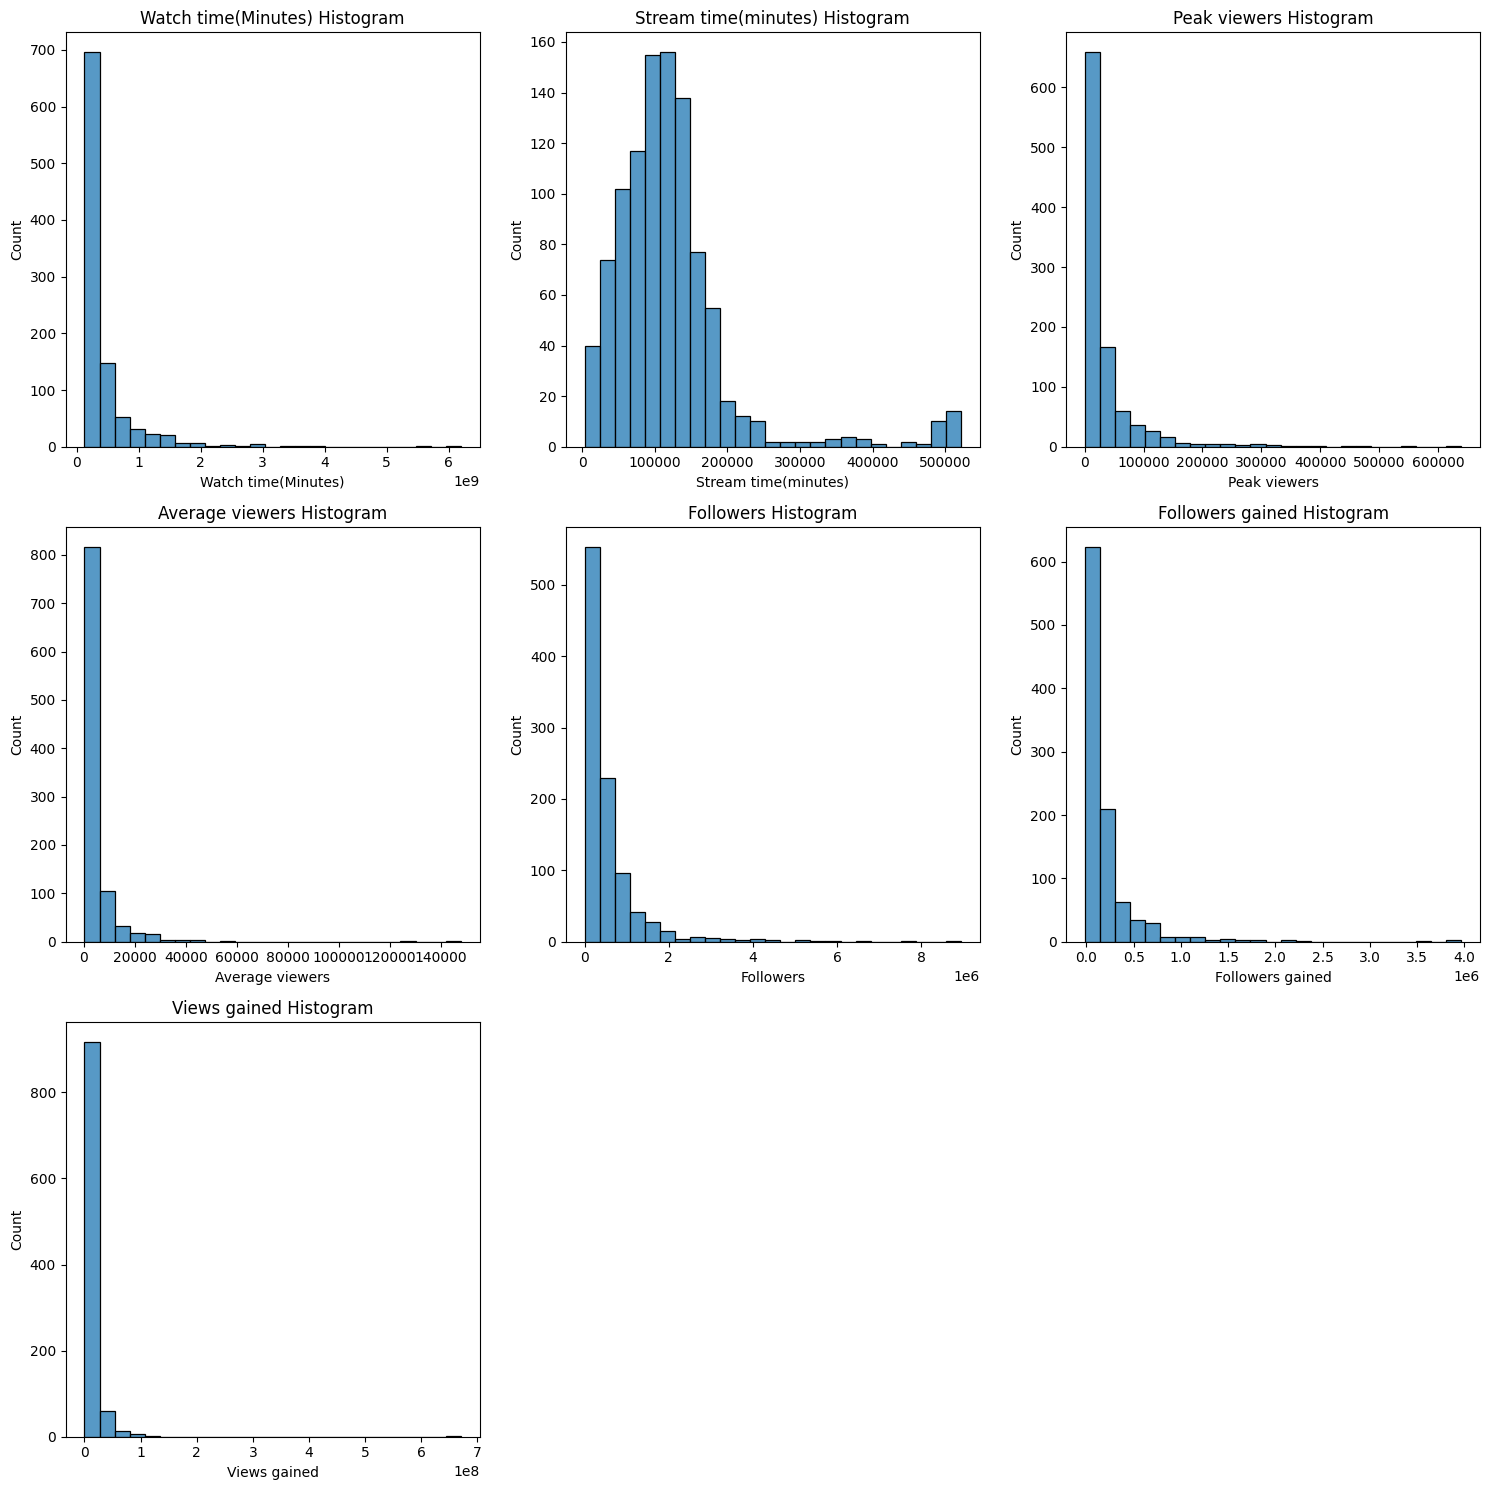

,column,max,min,mean,median,std
0,Watch time(Minutes),6196161750,122192850,4.184279e+08,234990787.5,5.496355e+08
1,Stream time(minutes),521445,3465,1.205152e+05,108240.0,8.537620e+04
2,Peak viewers,639375,496,3.706505e+04,16676.0,6.031431e+04
3,Average viewers,147643,235,4.781040e+03,2425.0,8.453685e+03
4,Followers,8938903,3660,5.700541e+05,318063.0,8.044134e+05
5,Followers gained,3966525,-15772,2.055185e+05,98352.0,3.399137e+05
6,Views gained,670137548,175788,1.166817e+07,6456323.5,2.490572e+07


In [25]:
# Get numeric and categorical columns and put into list
numeric_columns=df.select_dtypes(include=["int64"]).columns.tolist()
categorical_columns=df.select_dtypes(include=["object", "bool"]).columns.tolist()

stats = []
col_per_row = 3
num_rows = (len(numeric_columns) + col_per_row - 1) // col_per_row
fig, axes = plt.subplots(num_rows, col_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for col in numeric_columns:
    max = df[col].max()
    min = df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    stats.append({
        "column": col,
        "max": max,
        "min": min,
        "mean": mean,
        "median": median,
        "std" : std
    })

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], kde=False, bins=25)
    axes[i].set_title(f'{col} Histogram')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

stats_summary = pd.DataFrame(stats)
stats_summary

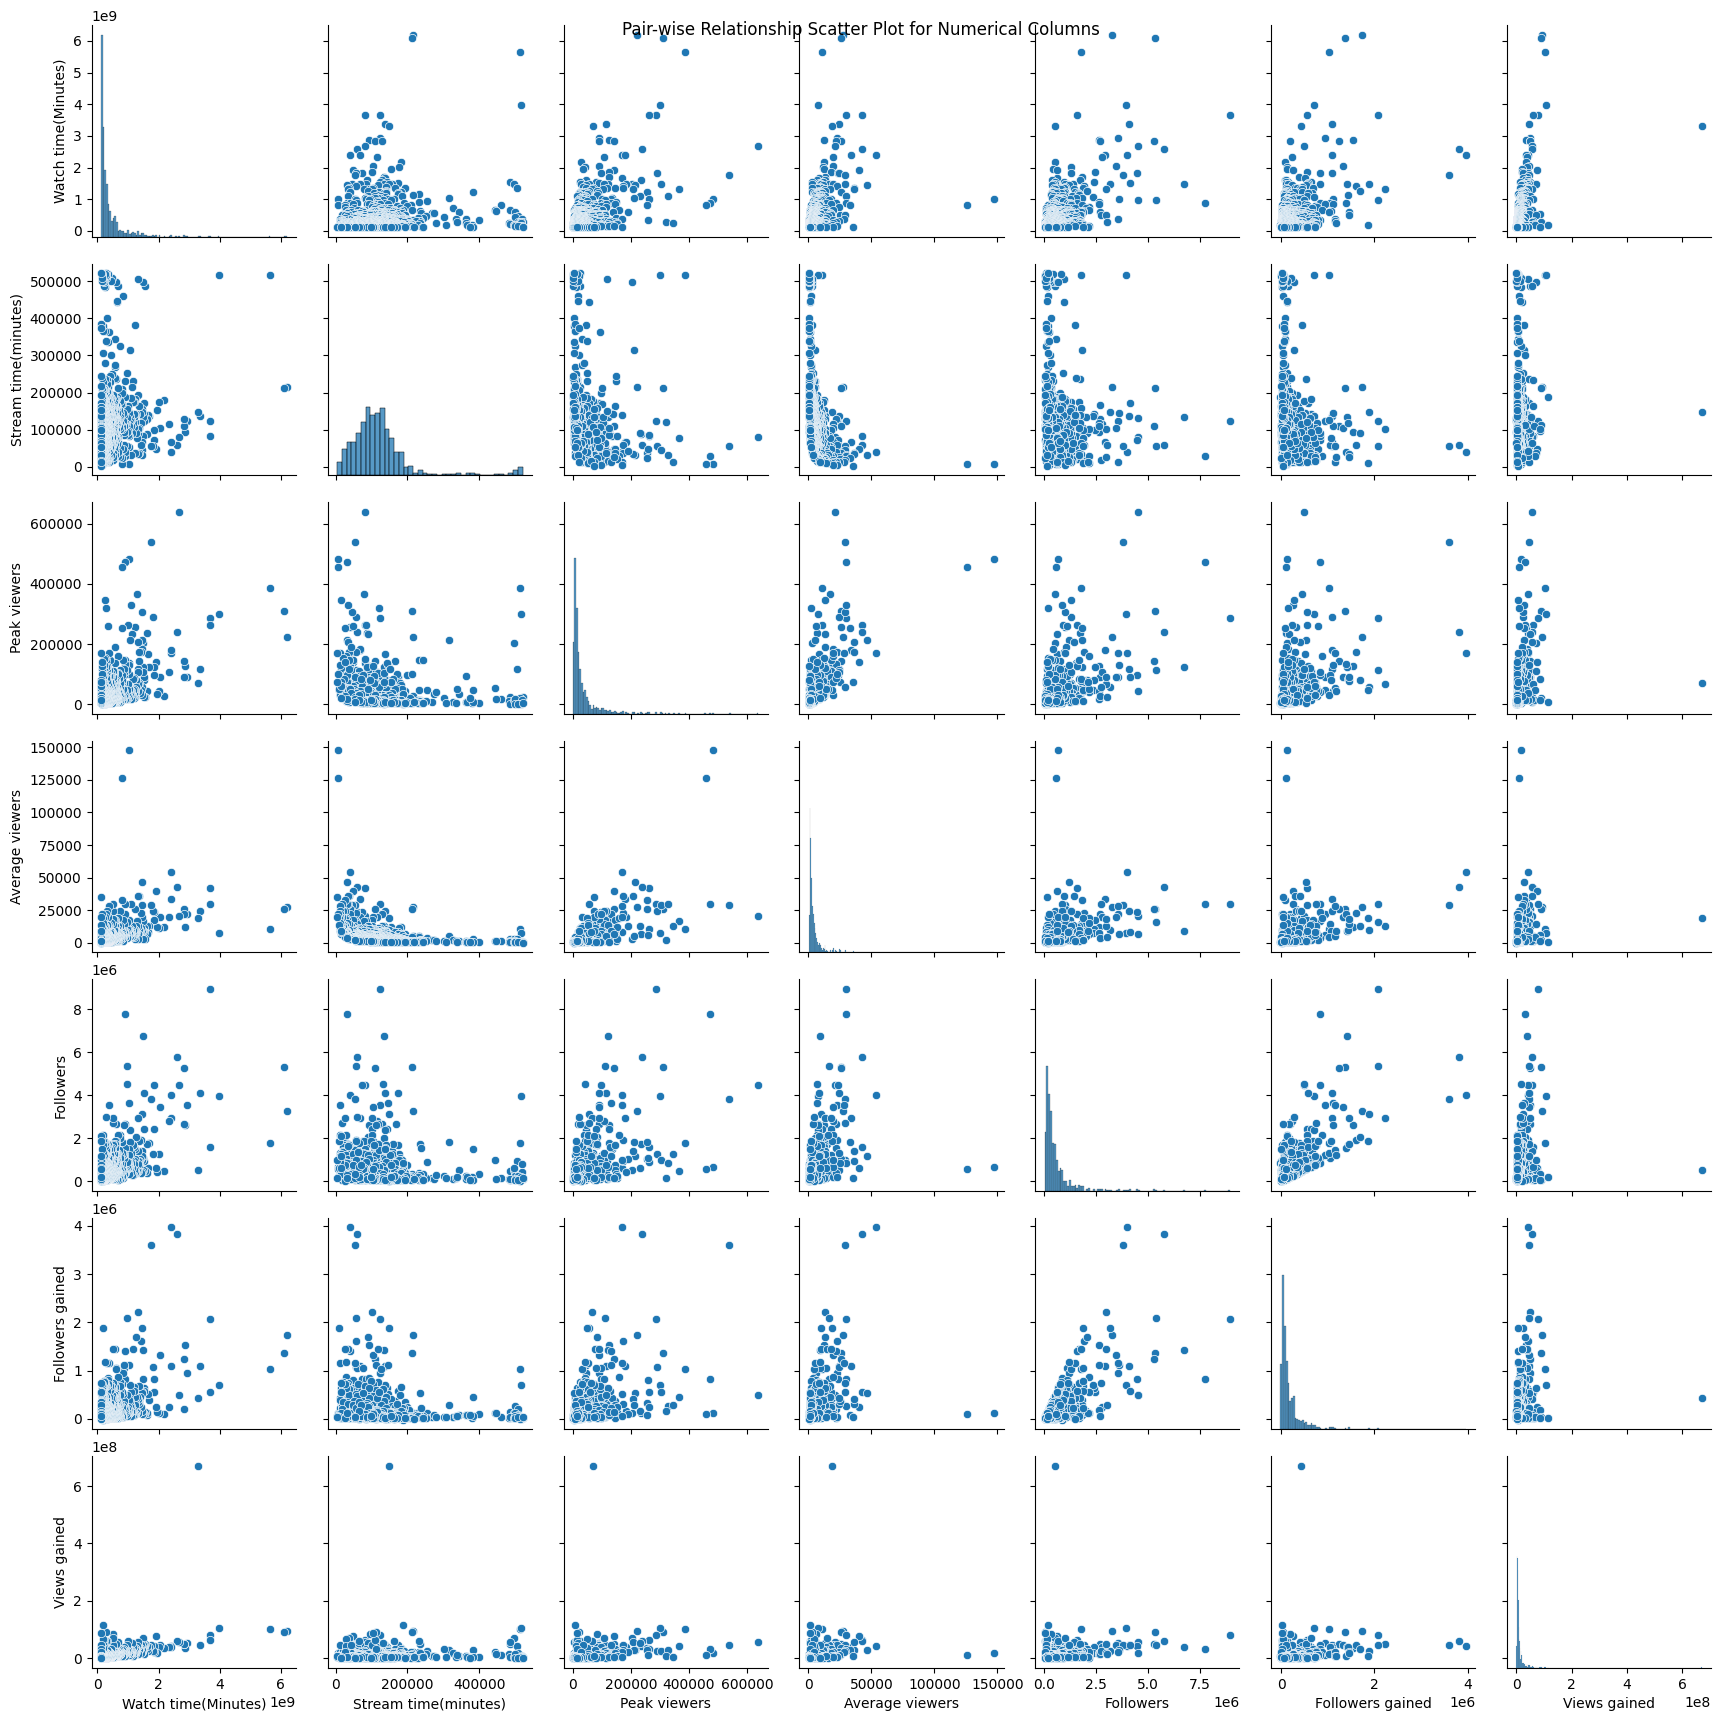

In [29]:
# Pair-wise relationship
sns.pairplot(df[numeric_columns])
plt.suptitle("Pair-wise Relationship Scatter Plot for Numerical Columns")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


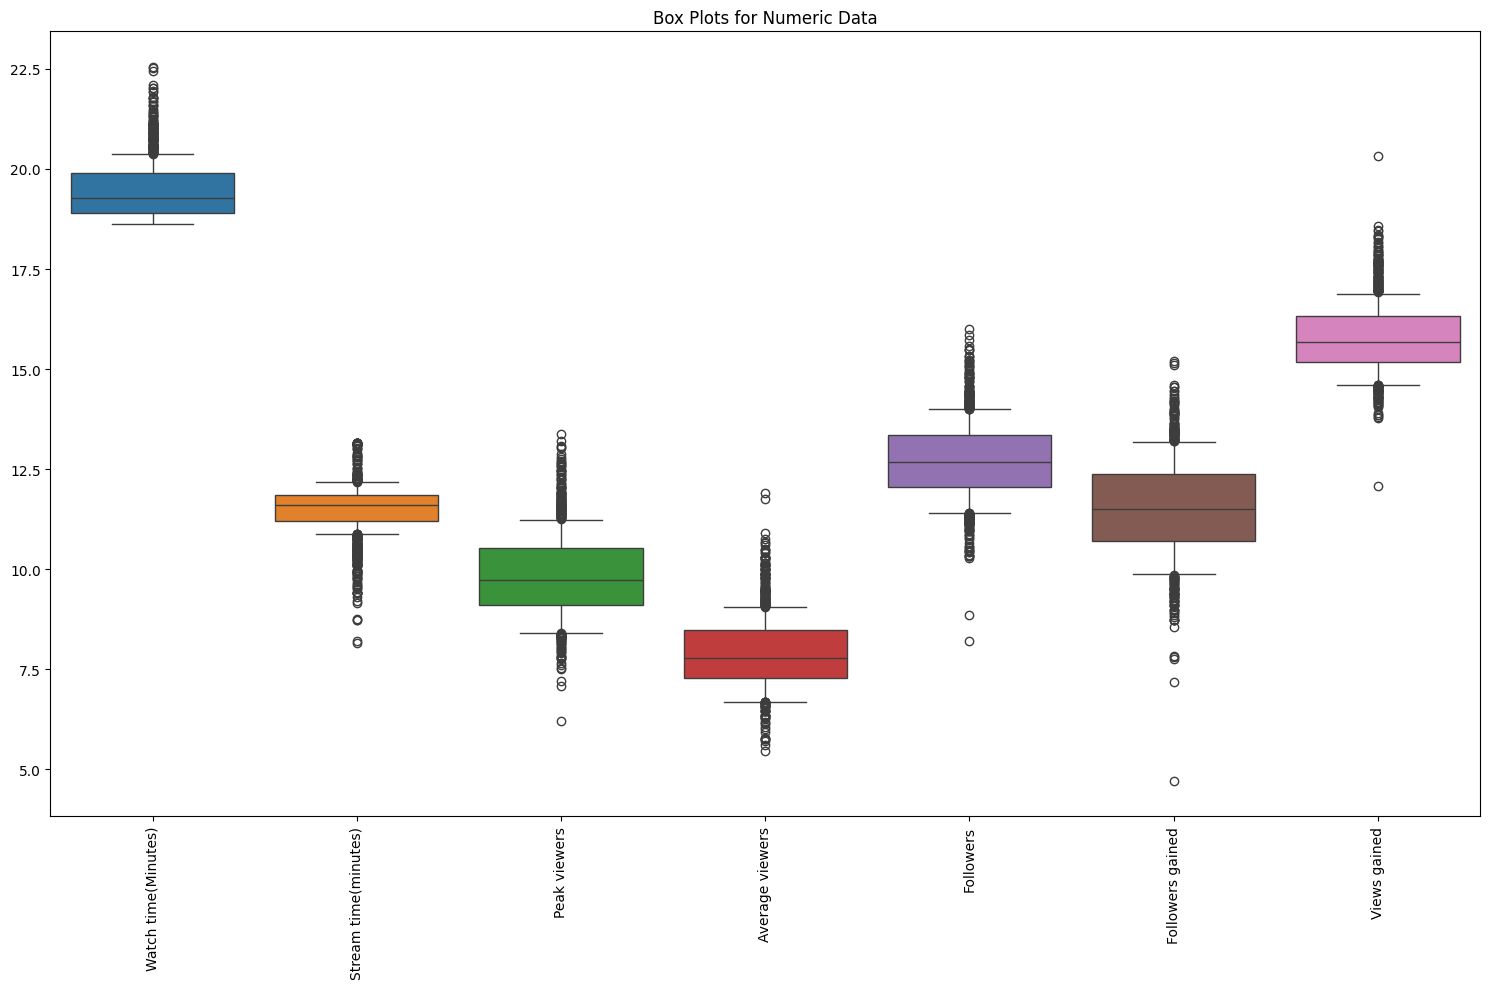

In [34]:
# Box plots for Numeric Data
log_data = df[numeric_columns].apply(lambda x: np.log1p(x))
plt.figure(figsize=(15, 10))
sns.boxplot(data=log_data, whis=0.5)
plt.xticks(rotation=90)
plt.title("Box Plots for Numeric Data")
plt.tight_layout()
plt.show()


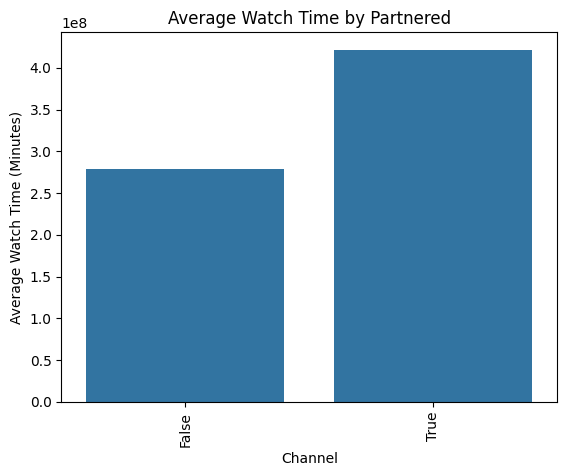

In [37]:
# Average watch time by channel
average_watch_time = df.groupby('Partnered')['Watch time(Minutes)'].mean().sort_values()
sns.barplot(x=average_watch_time.index, y=average_watch_time.values)
plt.xlabel('Channel')
plt.ylabel('Average Watch Time (Minutes)')
plt.title('Average Watch Time by Partnered')
plt.xticks(rotation=90)
plt.show()